## Spotify Top Songs
The dataset contains daily rankings of the 200 most played songs in 53 countries in 2017 and 2018 on Spotify. It contains over 2 million rows, comprising 6629 artists, 18598 songs for a total count of one hundred and five billion streams. The goal of this project is to understand what characteristics make a song popular. To that end, it is also provided with a file containing data on the music attributes (i.e., speech, acoustics, tempo) of several popular songs. Given the large size of the dataset, feel free to simplify your task by working with single country or single year rankings.

## Data manipulation

Lets start by downloading the data


In [ ]:
import pandas as pd
ranking_spotify_1 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/ranking_spotify_1.csv")
ranking_spotify_1.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [ ]:
ranking_spotify_2 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/ranking_spotify_2.csv")
ranking_spotify_2.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,54,Thunder,Imagine Dragons,5404,https://open.spotify.com/track/0tKcYR2II1VCQWT...,2017-08-24,cr
1,55,"Soy Peor Remix (feat. J Balvin, Ozuna & Arcangel)",Bad Bunny,5339,https://open.spotify.com/track/4UG962ViiLqoUyx...,2017-08-24,cr
2,56,Photograph,Ed Sheeran,5278,https://open.spotify.com/track/6fxVffaTuwjgEk5...,2017-08-24,cr
3,57,Thinking Out Loud,Ed Sheeran,5055,https://open.spotify.com/track/1Slwb6dOYkBlWal...,2017-08-24,cr
4,58,Imitadora,Romeo Santos,4976,https://open.spotify.com/track/6r46lnXFbE9fr2d...,2017-08-24,cr


In [ ]:
ranking_spotify_3 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/ranking_spotify_3.csv")
ranking_spotify_3.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,193,I'm the One,DJ Khaled,8316,https://open.spotify.com/track/3DXncPQOG4VBw3Q...,2017-11-21,dk
1,194,God Dag,KESI,8298,https://open.spotify.com/track/4Jg4Qp4byYVpJ5m...,2017-11-21,dk
2,195,Castle on the Hill,Ed Sheeran,8293,https://open.spotify.com/track/6PCUP3dWmTjcTtX...,2017-11-21,dk
3,196,September Song,JP Cooper,8278,https://open.spotify.com/track/2Inz7gGPGgieN0C...,2017-11-21,dk
4,197,Mi Gente (feat. Beyoncé),J Balvin,8261,https://open.spotify.com/track/7fwXWKdDNI5IutO...,2017-11-21,dk


In [ ]:
ranking_spotify_4 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/ranking_spotify_4.csv")
ranking_spotify_4.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,69,There for You,Martin Garrix,8323,https://open.spotify.com/track/6jA8HL9i4QGzsj6...,2017-06-24,co
1,70,Por Fin Te Encontré,Cali Y El Dandee,8312,https://open.spotify.com/track/3GpvoKKWZyTwgbL...,2017-06-24,co
2,71,One Dance,Drake,8306,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-06-24,co
3,72,Sé Que Te Duele,Alejandro Fernandez,8221,https://open.spotify.com/track/5vZfgeDfNhlkKeJ...,2017-06-24,co
4,73,Bad Liar,Selena Gomez,8188,https://open.spotify.com/track/1sCxVKWImDZSZKv...,2017-06-24,co


In [ ]:
#Combining all in one dataframe
ranking_spotify = pd.concat([ranking_spotify_1, ranking_spotify_2, ranking_spotify_3, ranking_spotify_4])

In [ ]:
features = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/featuresdf.csv")
features.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [ ]:
#Raname columns in order to do an inner product
#features.rename(columns = ['id',	'Track Name',	'artists',	'danceability',	'energy',	'key',	'loudness',	'mode',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo',	'duration_ms',	'time_signature'], inplace = True)
features.rename(columns = {'name': 'Track Name', 'artists': 'Artist'}, inplace = True)
features.head()


,id,Track Name,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [ ]:

merged_df = ranking_spotify.merge(features, how = 'inner', on = ['Track Name','Artist'])

In [ ]:
merged_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf,0.761,0.838,4.0,-3.073,0.0,0.0502,0.4,0.0,0.176,0.71,93.974,222560.0,4.0
1,1,Reggaetón Lento (Bailemos),CNCO,16672,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-02,ec,3AEZUABDXNtecAOSC1qTf,0.761,0.838,4.0,-3.073,0.0,0.0502,0.4,0.0,0.176,0.71,93.974,222560.0,4.0
2,1,Reggaetón Lento (Bailemos),CNCO,17258,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-03,ec,3AEZUABDXNtecAOSC1qTf,0.761,0.838,4.0,-3.073,0.0,0.0502,0.4,0.0,0.176,0.71,93.974,222560.0,4.0
3,1,Reggaetón Lento (Bailemos),CNCO,18146,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-04,ec,3AEZUABDXNtecAOSC1qTf,0.761,0.838,4.0,-3.073,0.0,0.0502,0.4,0.0,0.176,0.71,93.974,222560.0,4.0
4,1,Reggaetón Lento (Bailemos),CNCO,17788,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-05,ec,3AEZUABDXNtecAOSC1qTf,0.761,0.838,4.0,-3.073,0.0,0.0502,0.4,0.0,0.176,0.71,93.974,222560.0,4.0


In [ ]:



aggregation_functions = {
    'Position': 'first', 
    'Track Name':	'first',
    'Artist':'first',
    'Streams': 'sum',
    'URL': 'first',	
    'Date': 'first',
    'Region': 'first',
    'id': 'first',
    'danceability': 'first',
    'energy': 'first',
    'key': 'first',
    'loudness':'first',
    'mode': 'first',
    'speechiness': 'first',
    'acousticness':'first',
    'instrumentalness': 'first',
    'liveness':'first',
    'valence':'first',
    'tempo':'first',
    'duration_ms':'first',
    'time_signature':'first'}

    
df = merged_df.groupby(merged_df['id']).aggregate(aggregation_functions)

In [ ]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,,,,,
00lNx0OcTJrS3MKHcB80H,176,You Don't Know Me - Radio Edit,Jax Jones,506844646,https://open.spotify.com/track/00lNx0OcTJrS3MK...,2017-03-16,ec,00lNx0OcTJrS3MKHcB80H,0.876,0.669,11.0,-6.054,0.0,0.1380,0.1630,0.000000,0.1850,0.682,124.007,213947.0,4.0
04DwTuZ2VBdJCCC5TROn7,39,In the Name of Love,Martin Garrix,389117176,https://open.spotify.com/track/04DwTuZ2VBdJCCC...,2017-01-01,ec,04DwTuZ2VBdJCCC5TROn7,0.490,0.485,4.0,-6.237,0.0,0.0406,0.0592,0.000000,0.3370,0.196,133.889,195840.0,4.0
0CcQNd8CINkwQfe1RDtGV,146,Believer,Imagine Dragons,1015847453,https://open.spotify.com/track/0CcQNd8CINkwQfe...,2017-02-03,ec,0CcQNd8CINkwQfe1RDtGV,0.779,0.787,10.0,-4.305,0.0,0.1080,0.0524,0.000000,0.1400,0.708,124.982,204347.0,4.0
0CokSRCu5hZgPxcZBaEzV,195,Glorious (feat. Skylar Grey),Macklemore,564980207,https://open.spotify.com/track/3HVr6jTVwBHBa2f...,2017-08-03,ec,0CokSRCu5hZgPxcZBaEzV,0.731,0.794,0.0,-5.126,0.0,0.0522,0.0323,0.000026,0.1120,0.356,139.994,220454.0,4.0
0KKkJNfGyhkQ5aFogxQAP,148,That's What I Like,Bruno Mars,1136379512,https://open.spotify.com/track/0KKkJNfGyhkQ5aF...,2017-02-13,ec,0KKkJNfGyhkQ5aFogxQAP,0.853,0.560,1.0,-4.961,1.0,0.0406,0.0130,0.000000,0.0944,0.860,134.066,206693.0,4.0


In [ ]:
list(df.columns)

['Position',
 'Track Name',
 'Artist',
 'Streams',
 'URL',
 'Date',
 'Region',
 'id',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [ ]:
#Dropping useless columns. As the dependent variable will be "streams" as a measure of the popularity of the track
df.drop(['Position', 'Track Name', 'Artist','URL', 'Region',], axis=1)

,Streams,Date,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,,
00lNx0OcTJrS3MKHcB80H,506844646,2017-03-16,00lNx0OcTJrS3MKHcB80H,0.876,0.669,11.0,-6.054,0.0,0.1380,0.16300,0.000000,0.1850,0.682,124.007,213947.0,4.0
04DwTuZ2VBdJCCC5TROn7,389117176,2017-01-01,04DwTuZ2VBdJCCC5TROn7,0.490,0.485,4.0,-6.237,0.0,0.0406,0.05920,0.000000,0.3370,0.196,133.889,195840.0,4.0
0CcQNd8CINkwQfe1RDtGV,1015847453,2017-02-03,0CcQNd8CINkwQfe1RDtGV,0.779,0.787,10.0,-4.305,0.0,0.1080,0.05240,0.000000,0.1400,0.708,124.982,204347.0,4.0
0CokSRCu5hZgPxcZBaEzV,564980207,2017-08-03,0CokSRCu5hZgPxcZBaEzV,0.731,0.794,0.0,-5.126,0.0,0.0522,0.03230,0.000026,0.1120,0.356,139.994,220454.0,4.0
0KKkJNfGyhkQ5aFogxQAP,1136379512,2017-02-13,0KKkJNfGyhkQ5aFogxQAP,0.853,0.560,1.0,-4.961,1.0,0.0406,0.01300,0.000000,0.0944,0.860,134.066,206693.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7nZmah2llfvLDiUjm0kiy,551075212,2017-08-17,7nZmah2llfvLDiUjm0kiy,0.744,0.739,8.0,-5.350,1.0,0.0387,0.00459,0.000000,0.3060,0.649,104.990,189467.0,4.0
7qiZfU4dY1lWllzX7mPBI,2993988783,2017-01-06,7qiZfU4dY1lWllzX7mPBI,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,4.0
7tr2za8SQg2CI8EDgrdtN,785069695,2017-02-24,7tr2za8SQg2CI8EDgrdtN,0.736,0.795,1.0,-3.299,0.0,0.0545,0.49800,0.000001,0.2540,0.511,104.066,230813.0,4.0


In [ ]:
list(df.columns)

['Position',
 'Track Name',
 'Artist',
 'Streams',
 'URL',
 'Date',
 'Region',
 'id',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

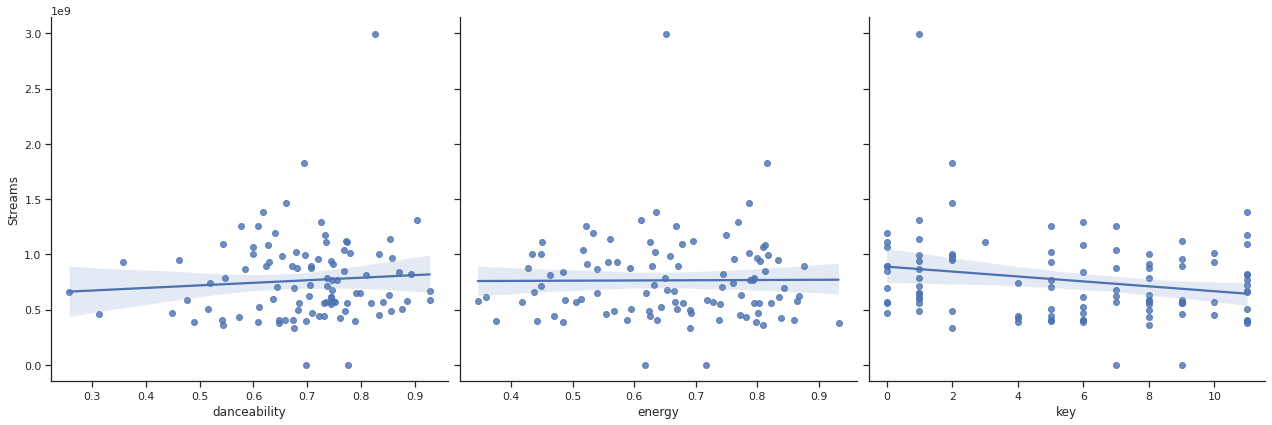

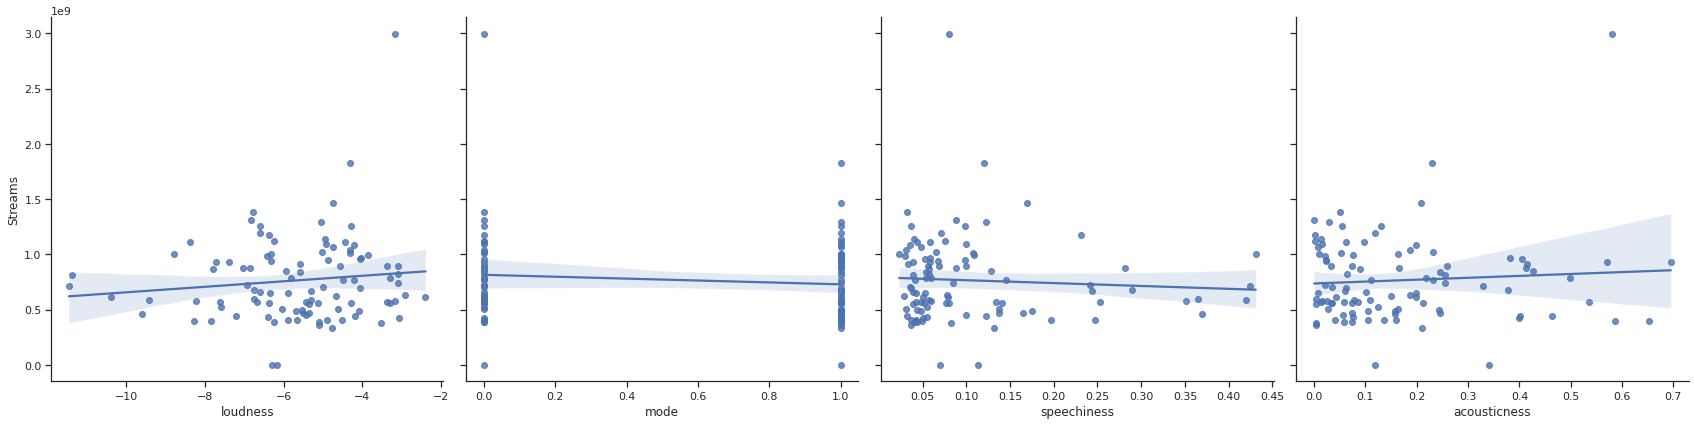

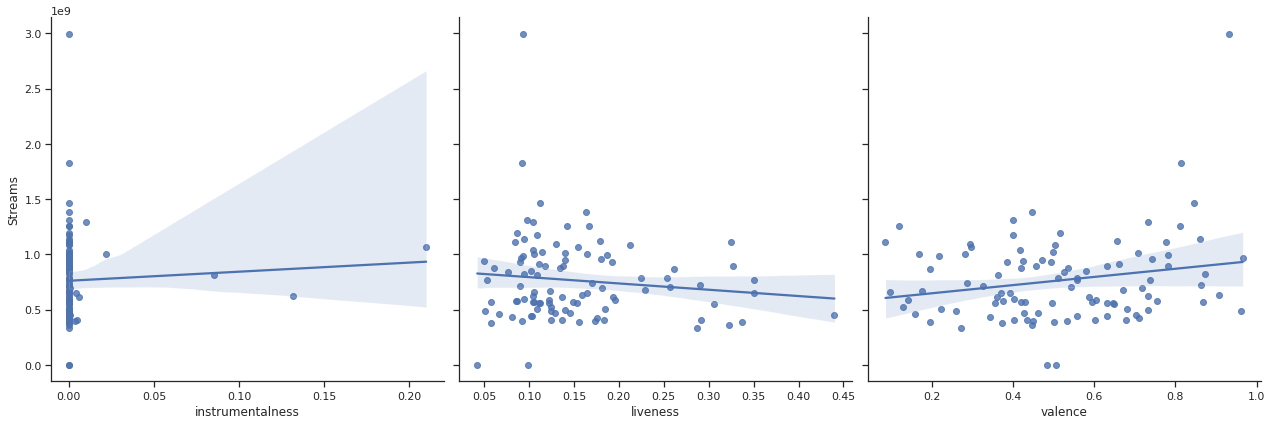

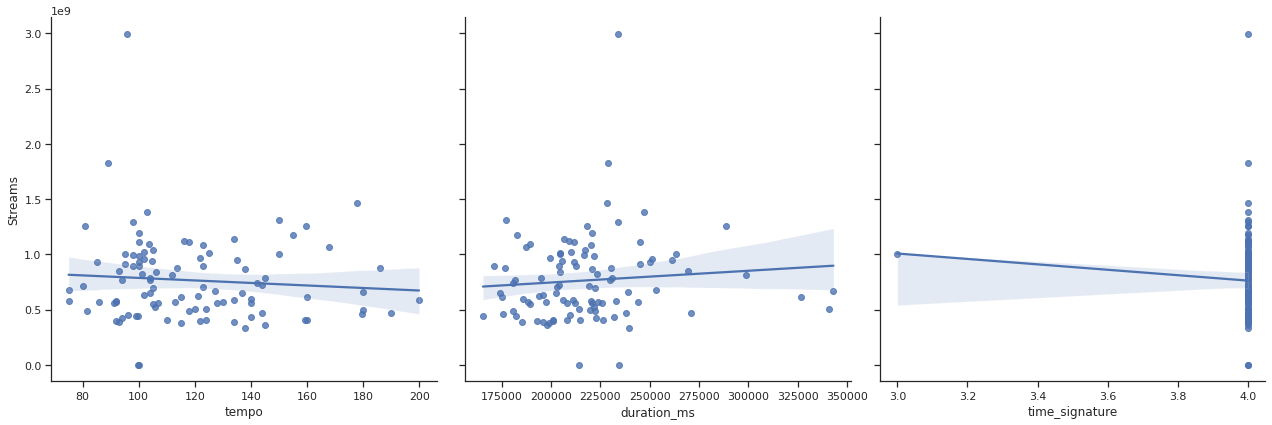

In [ ]:
# Using diagrams to visualize the correlations
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)


list_x_f = ['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

sns.pairplot(df, x_vars=list_x_f[0:3], y_vars='Streams',  height=6, aspect=1, kind='reg')
sns.pairplot(df, x_vars=list_x_f[3:7], y_vars='Streams',  height=6, aspect=1, kind='reg')
sns.pairplot(df, x_vars=list_x_f[7:10], y_vars='Streams',  height=6, aspect=1, kind='reg')
sns.pairplot(df, x_vars=list_x_f[10:], y_vars='Streams',  height=6, aspect=1, kind='reg')

From the 2D representation of features vs streams( as a measure of the popularity of a given track) it's quiet impossible to determine which features are better than others because no strong linear correlation can be appreciated.

But, it's possible to conclude that time_signature and instrumentalness are almost useless features.

## Regression Models

Lets start by spliting the data into train and test datasets and then compare the performance obtained by using diferent regression models

In [ ]:
from sklearn.model_selection import train_test_split



X = df[list_x_f]
y = df['Streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77) 

In [ ]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,
00lNx0OcTJrS3MKHcB80H,0.876,0.669,11.0,-6.054,0.0,0.1380,0.16300,0.000000,0.1850,0.682,124.007,213947.0,4.0
04DwTuZ2VBdJCCC5TROn7,0.490,0.485,4.0,-6.237,0.0,0.0406,0.05920,0.000000,0.3370,0.196,133.889,195840.0,4.0
0CcQNd8CINkwQfe1RDtGV,0.779,0.787,10.0,-4.305,0.0,0.1080,0.05240,0.000000,0.1400,0.708,124.982,204347.0,4.0
0CokSRCu5hZgPxcZBaEzV,0.731,0.794,0.0,-5.126,0.0,0.0522,0.03230,0.000026,0.1120,0.356,139.994,220454.0,4.0
0KKkJNfGyhkQ5aFogxQAP,0.853,0.560,1.0,-4.961,1.0,0.0406,0.01300,0.000000,0.0944,0.860,134.066,206693.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7nZmah2llfvLDiUjm0kiy,0.744,0.739,8.0,-5.350,1.0,0.0387,0.00459,0.000000,0.3060,0.649,104.990,189467.0,4.0
7qiZfU4dY1lWllzX7mPBI,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,4.0
7tr2za8SQg2CI8EDgrdtN,0.736,0.795,1.0,-3.299,0.0,0.0545,0.49800,0.000001,0.2540,0.511,104.066,230813.0,4.0


In [ ]:
#Check shape of dataFrames
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 13)
(75,)
(25, 13)
(25,)


### Basic Linear Regression model

As a starting point, let's consider the very first linear regression model based on least squared minimization.

In [ ]:
# Basic Linear Regression model

import numpy as np
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
fit = linear_regressor.fit(X_train, y_train)

In [ ]:
# Lets check the Fit score, which by default is R^2
fit.score(X_train, y_train)

0.16869412724386057

In [ ]:
# Print coefficients and intercept
print(fit.intercept_)
print(fit.coef_)

1987648788.185996
[-1.91428566e+08 -8.07072723e+07 -9.75668886e+06 -1.88181902e+07
 -5.45078598e+07 -6.28161768e+08 -1.55438416e+08  1.93677274e+09
 -7.72580077e+08  3.73314603e+08 -1.24647766e+06  4.35476077e+02
 -2.50592234e+08]


In [ ]:
#Lets make predictions based on our model and test data

y_pred = fit.predict(X_test)
y_pred

array([8.23942633e+08, 8.52391434e+08, 7.82538607e+08, 9.41955387e+08,
       1.14086907e+09, 6.76669116e+08, 7.64216508e+08, 9.87544405e+08,
       6.75003752e+08, 5.54522587e+08, 9.79969213e+08, 7.24033456e+08,
       7.94081133e+08, 8.83517316e+08, 5.31844943e+08, 7.11934723e+08,
       5.78286438e+08, 6.17799296e+08, 7.56874097e+08, 6.05545313e+08,
       8.66440314e+08, 7.78729813e+08, 6.52070347e+08, 9.32687177e+08,
       7.80361500e+08])

In [ ]:
#Now we need to evaluate the performance of our prediction
from sklearn import metrics
print("MAE =", metrics.mean_absolute_error(y_test, y_pred))

MAE = 349437780.6575815


In [ ]:
print("MSE =",metrics.mean_squared_error(y_test, y_pred))

MSE = 2.8485348542617763e+17


In [ ]:
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE = 533716671.4898249


As it can be seen, the performance is really poor. So, it must be improved

The first proposal is to use other methods:
* Ridge : Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares.

  hyperparameter  --> alpha (i.e, weight of the penalization coeficient)
* Lasso : The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason, Lasso and its variants are fundamental to the field of compressed sensing.

  hyperparameter --> alpha (same that in Ridge, what changes is the equation that determines the penalization factor. In this case, it uses absolute value, while Ridge regression uses quadratic terms
* Decision Trees : Decision trees can also be used for regression perpous, the difference is that the independent variable are supposed to be float type, instead of, integers.

  hyperparameter --> Max depth for the tree




 

### Ridge Regression

In [ ]:
#Ridge
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.5)
reg_fit = reg.fit(X_train, y_train)
reg_fit.score(X_train, y_train)

0.13122498186542453

In [ ]:
print(reg_fit.intercept_)
print(reg_fit.coef_)

1703368803.618022
[-1.21562419e+08 -7.26021777e+07 -1.21121941e+07 -5.18942614e+06
 -4.10999248e+07 -3.14588213e+08 -9.41740937e+07  1.41812463e+08
 -3.57310250e+08  2.46041957e+08 -1.13449409e+06  3.53488514e+02
 -1.80185223e+08]


In [ ]:
y_pred = reg_fit.predict(X_test)
y_pred
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE = 512275324.59749043


Even with the penalization term to the sum of the residues in the regression, the model doesn't seems to improve the performance in an appreciable manner.

Let's evaluate if the nature of reducing the number of "active" variables of LASSO regression can deal with this situation.

#### LASSO 
As many features may not incorporate useful information to the estimation. Lasso regression is a good alternative, as it tends to estimations based on fewer non zero coeficients.

In [ ]:
from sklearn import linear_model
las = linear_model.Lasso(alpha=0.9)
las_fit= las.fit(X_train, y_train)
las_fit.score(X_train, y_train)

0.1686941272438377

In [ ]:
print(las_fit.intercept_)
print(las_fit.coef_)

1987648441.1032147
[-1.91428442e+08 -8.07071211e+07 -9.75669053e+06 -1.88181900e+07
 -5.45078402e+07 -6.28161713e+08 -1.55438365e+08  1.93677089e+09
 -7.72579974e+08  3.73314477e+08 -1.24647748e+06  4.35475880e+02
 -2.50592177e+08]


In [ ]:
y_pred = las_fit.predict(X_test)
y_pred
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE = 533716659.6045088


Even if the performance didn't improve, some extra information can be extract by this model. Analysing the slope coefficients, we can see that "duration_ms" is weighted considerably lower than the rest of the features. So, that could be a sign that that feature is not giving us valuable information.

### Decision Trees


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=0, max_depth=13)
clf_fit = clf.fit(X, y)
clf_fit.score(X_train, y_train)

0.9977236560308742

In [ ]:
y_pred = clf_fit.predict(X_test)
y_pred
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE = 33475787.817571186


In [ ]:
from sklearn.tree import export_text
r = export_text(clf_fit, feature_names=list_x_f)
print(r)

|--- valence <= 0.77
|   |--- acousticness <= 0.00
|   |   |--- liveness <= 0.10
|   |   |   |--- value: [1311243745.00]
|   |   |--- liveness >  0.10
|   |   |   |--- speechiness <= 0.15
|   |   |   |   |--- value: [1119944498.00]
|   |   |   |--- speechiness >  0.15
|   |   |   |   |--- value: [1171827725.00]
|   |--- acousticness >  0.00
|   |   |--- liveness <= 0.05
|   |   |   |--- value: [3700988.00]
|   |   |--- liveness >  0.05
|   |   |   |--- duration_ms <= 244398.50
|   |   |   |   |--- instrumentalness <= 0.01
|   |   |   |   |   |--- speechiness <= 0.03
|   |   |   |   |   |   |--- danceability <= 0.71
|   |   |   |   |   |   |   |--- value: [987780468.00]
|   |   |   |   |   |   |--- danceability >  0.71
|   |   |   |   |   |   |   |--- value: [1042161672.00]
|   |   |   |   |   |--- speechiness >  0.03
|   |   |   |   |   |   |--- key <= 1.50
|   |   |   |   |   |   |   |--- liveness <= 0.09
|   |   |   |   |   |   |   |   |--- key <= 0.50
|   |   |   |   |   |   |   |  

It seems like a depth of 13 is enough. Lets analysis the performance using different tunings 

In [ ]:
depths = [i for i in range(1,20)]

for i_d in depths:
  clf_scan = tree.DecisionTreeRegressor(random_state=0, max_depth=i_d)
  clf_scan = clf_scan.fit(X, y)
  y_pred = clf_scan.predict(X_test)
  print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)),'; depth = ',i_d)

RMSE = 472306299.93539554 ; depth =  1
RMSE = 274263994.874924 ; depth =  2
RMSE = 241197219.2244055 ; depth =  3
RMSE = 225076988.94178763 ; depth =  4
RMSE = 214011060.81541407 ; depth =  5
RMSE = 195015764.82350308 ; depth =  6
RMSE = 174453169.41721913 ; depth =  7
RMSE = 170860243.2303588 ; depth =  8
RMSE = 150796059.01507166 ; depth =  9
RMSE = 136550332.86849093 ; depth =  10
RMSE = 71975535.43253787 ; depth =  11
RMSE = 57426090.7171253 ; depth =  12
RMSE = 33475787.817571186 ; depth =  13
RMSE = 5405634.789193779 ; depth =  14
RMSE = 5392581.2 ; depth =  15
RMSE = 3978422.9 ; depth =  16
RMSE = 0.0 ; depth =  17
RMSE = 0.0 ; depth =  18
RMSE = 0.0 ; depth =  19


Finally,  Decision Trees seems like the best model in this case, as the performance is considerably better than the previously obtained. Also, a max depth of 13 is already giving an excellent performance with the test set, so overfitting may be not happen, which is one of the main disadvantages of this method, as it tends to model the train data losing generalization capacities.

### Reduced number of features

Sometimes, using all the features available is not useful. During the previous analysis some features were pointed out to not give further information. So, Ridge and Lasso model are going to be trained without considering: 
* instrumentalness
* time signature
* duration_ms

In [ ]:
list_x_f2 = ['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'liveness',
 'valence',
 'tempo']
X = df[list_x_f2]
y = df['Streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77) 

In [ ]:
#Ridge
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.5)
reg_fit = reg.fit(X_train, y_train)
y_pred = reg_fit.predict(X_test)
y_pred
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE = 518752665.54400414


In [ ]:
from sklearn import linear_model
las = linear_model.Lasso(alpha=0.9)
las_fit= las.fit(X_train, y_train)
y_pred = las_fit.predict(X_test)
y_pred
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE = 538421739.3554785


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=0, max_depth=13)
clf_fit = clf.fit(X, y)

depths = [i for i in range(1,20)]

for i_d in depths:
  clf_scan = tree.DecisionTreeRegressor(random_state=0, max_depth=i_d)
  clf_scan = clf_scan.fit(X, y)
  y_pred = clf_scan.predict(X_test)
  print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)),'; depth = ',i_d)

RMSE = 472306299.93539554 ; depth =  1
RMSE = 274263994.874924 ; depth =  2
RMSE = 239026874.0016913 ; depth =  3
RMSE = 248877546.26115587 ; depth =  4
RMSE = 225880484.20649517 ; depth =  5
RMSE = 217506914.9876837 ; depth =  6
RMSE = 203435734.80690014 ; depth =  7
RMSE = 201718012.93475416 ; depth =  8
RMSE = 174221995.71049994 ; depth =  9
RMSE = 107398106.44701998 ; depth =  10
RMSE = 97311067.69805035 ; depth =  11
RMSE = 63391567.345270164 ; depth =  12
RMSE = 64495237.38920079 ; depth =  13
RMSE = 43377322.168130994 ; depth =  14
RMSE = 50527344.77988008 ; depth =  15
RMSE = 30087139.18125852 ; depth =  16
RMSE = 8837324.98124009 ; depth =  17
RMSE = 6819389.993030947 ; depth =  18
RMSE = 2348733.2929949844 ; depth =  19


No improvement was achieved neither in Ridge or Lasso models, even the performance of the Decision tree was reduced.


_In Conclusion_: the better alternative is to use a decision tree with the first feature set considered and using a depth equal to 13 or more.

## NN for Regression


In [ ]:
 from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=10,
                    random_state=77,
                    max_iter=5000,
                    #activation='identity',
                    activation='relu',
                    solver= 'adam',
                    alpha=0.001,
                    learning_rate_init=0.001).fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE = 164663455.5553862


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
y_pred

array([1.33707742e+08, 1.21829697e+08, 1.48155693e+08, 1.72055772e+08,
       1.42592862e+08, 1.46335696e+08, 1.63384672e+08, 2.20028063e+08,
       1.50086775e+08, 1.51804802e+08, 1.33171516e+08, 1.49240029e+08,
       1.50580524e+08, 1.64424429e+08, 1.50788276e+08, 1.62730078e+08,
       1.69818412e+08, 1.69189017e+08, 1.57743249e+08, 1.80577585e+08,
       1.51506045e+08, 1.68163510e+08, 1.79520085e+08, 2.40759386e+08,
       1.48004664e+08])